# Comparison between single and double q learning agents in 10-bandit problem

Import environment and necessary libraries.
Initialize rewards, total rewards, epsilon and episodes

In [1]:
import gym
import gym_envs
import numpy as np
from math import e

%matplotlib inline
import matplotlib.pyplot as plt

reward_list = []
reward_list_d = []
total_reward = 0
total_reward_d = 0

epsilon = 0.1
alpha = 0.1
gamma = 1
max_episodes = 1000

Double q learning experiment

In [2]:
env = gym.make("NArmedBandit-v0")
env.seed(2)
table_q_a = np.zeros(env.action_space.n)
table_q_b = np.zeros(env.action_space.n)
env.reset()

for episode in np.arange(max_episodes):
    if env.np_random.uniform() < epsilon:
        action = env.np_random.randint(env.action_space.n)
    else:
        action = np.argmax((table_q_a+table_q_b))
    _, reward, _, _ = env.step(action)
    if env.np_random.uniform()<0.5:
        table_q_a[action] = table_q_a[action] + alpha*(reward+gamma*table_q_b[np.argmax(table_q_a)]-table_q_a[action])
    else:
        table_q_b[action] = table_q_b[action] + alpha*(reward+gamma*table_q_a[np.argmax(table_q_b)]-table_q_b[action])

    total_reward_d +=reward
    reward_list_d.append(total_reward_d/(episode+1))

In [3]:
table_q = np.zeros(env.action_space.n)
env.reset()

for episode in np.arange(max_episodes):
    if env.np_random.uniform() < epsilon:
        action = env.np_random.randint(env.action_space.n)
    else:
        action = np.argmax(table_q)
    _, reward, _, _ = env.step(action)
    table_q[action] = table_q[action] + alpha*(reward+gamma*np.argmax(table_q)-table_q[action])

    total_reward +=reward
    reward_list.append(total_reward/(episode+1))

Visualize the data<br>
Graphs of average reward over 50 actions

Text(0,0.5,'Reward')

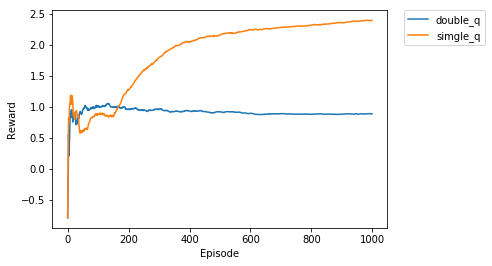

In [4]:
plt.plot(reward_list_d, label='double_q')
plt.plot(reward_list, label='simgle_q')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Episode')
plt.ylabel('Reward')

Total rewards

In [5]:
print("Total rewards")
print('{:10} {:.3f}'.format("Double q:", total_reward_d))
print('{:10} {:.3f}'.format("Single q:", total_reward))
print('{:10} {:.3f}'.format("Optimal:", max_episodes*env.getmax()))

Total rewards
Double q:  884.696
Single q:  2393.010
Optimal:   2896.986


Approximated Q-values of each action

In [6]:
print("Q-value approximations:")
np.set_printoptions(precision=3)
print('{:10}'.format("Double q_a:"),end=" ")
print(table_q_a)
print('{:10}'.format("Double q_b:"),end=" ")
print(table_q_b)
print('{:10}'.format("Single q:"),end=" ")
print(table_q)
env.render()

Q-value approximations:
Double q_a: [ 7.349 41.76   9.224 17.655  9.734  9.623  7.547  7.962  6.299  4.962]
Double q_b: [ 6.532 41.522 14.78   3.48  11.529  7.708 13.499 15.24   9.192  5.031]
Single q:  [ 4.295  5.565  5.877  5.379  5.531  5.615  5.412  3.792 10.767  2.317]
True vals: [ 0.420  0.971  1.502  1.013  0.066  0.783  0.335 -1.371  2.897 -1.972 ]
